In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/upload_DJIA_table.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [ ]:
import tensorflow as tf
print("Available GPU:", tf.test.is_gpu_available())
print("List of Devices:", tf.config.list_physical_devices('GPU'))


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Available GPU: True
List of Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# prompt: convert df['date'] column to datetime

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1989 non-null   datetime64[ns]
 1   Open       1989 non-null   float64       
 2   High       1989 non-null   float64       
 3   Low        1989 non-null   float64       
 4   Close      1989 non-null   float64       
 5   Volume     1989 non-null   int64         
 6   Adj Close  1989 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 108.9 KB


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


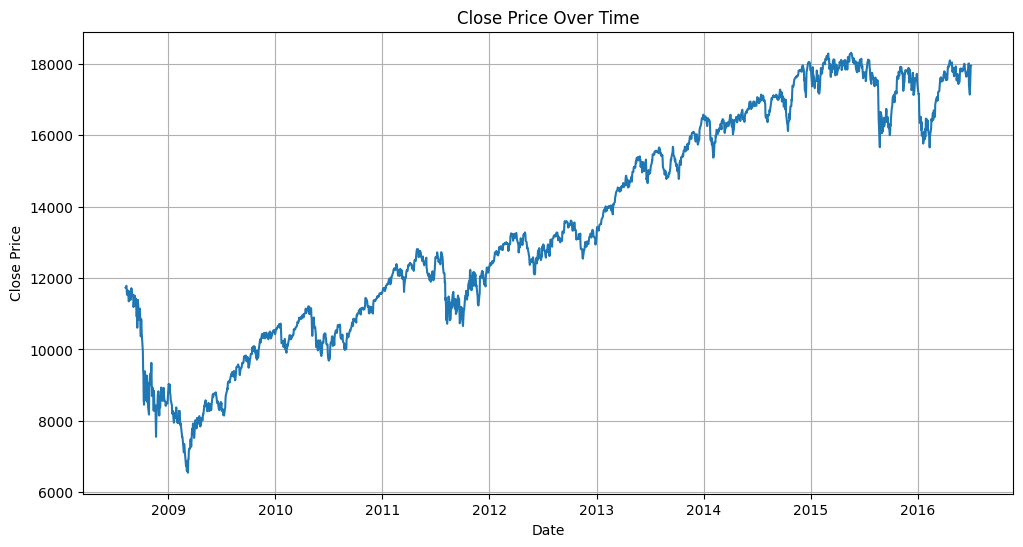

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [ ]:
df['Daily Return'] = df['Close'].pct_change()


In [ ]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA21'] = df['Close'].rolling(window=21).mean()


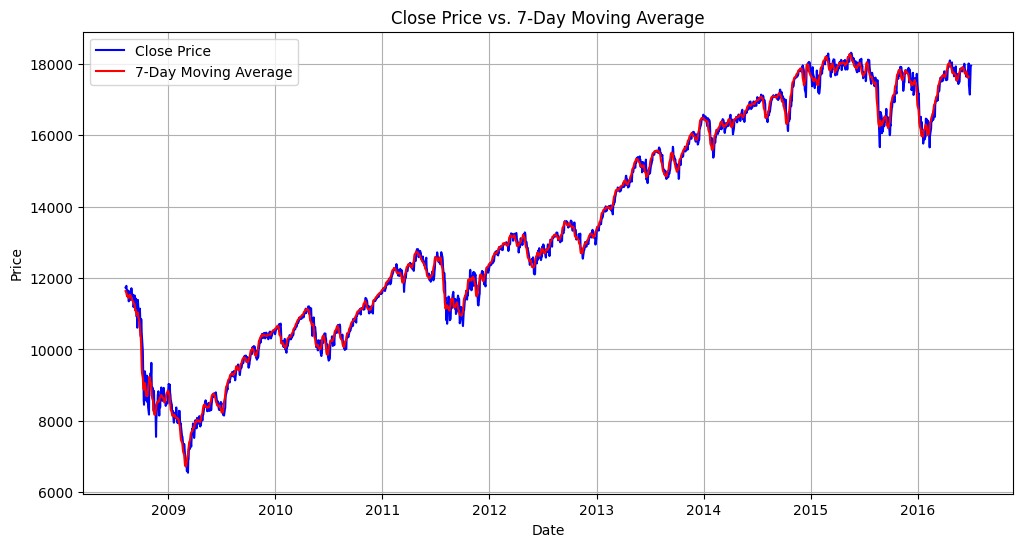

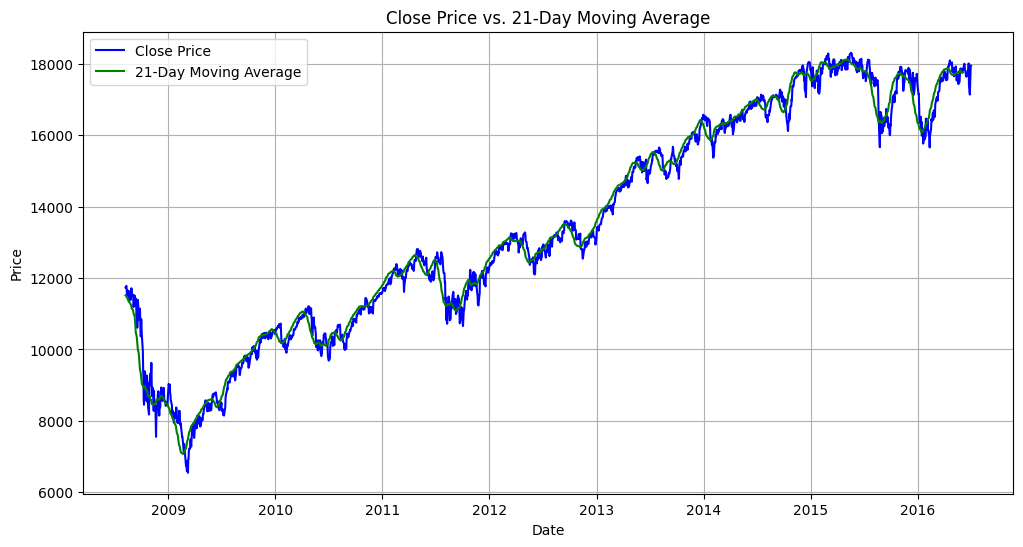

In [ ]:
# prompt: df['MA7'] = df['Close'].rolling(window=7).mean()
# df['MA21'] = df['Close'].rolling(window=21).mean()    draw these two columns vs df['close']   in different plots

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA7'], label='7-Day Moving Average', color='red')
plt.title('Close Price vs. 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA21'], label='21-Day Moving Average', color='green')
plt.title('Close Price vs. 21-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df['Volatility'] = df['Close'].rolling(window=7).std()


######daily return histogram

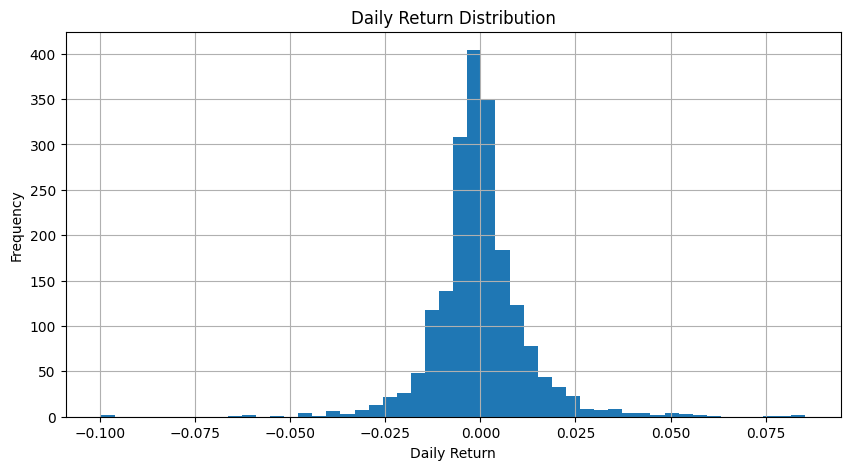

In [ ]:
df['Daily Return'].hist(bins=50, figsize=(10,5))
plt.title('Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**correlation heatmap**

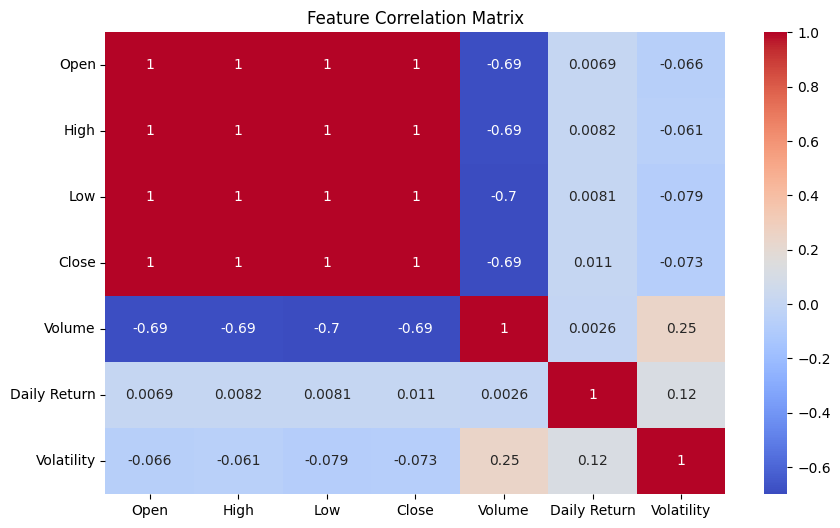

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return', 'Volatility']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


####Seasonal Decomposition Plot

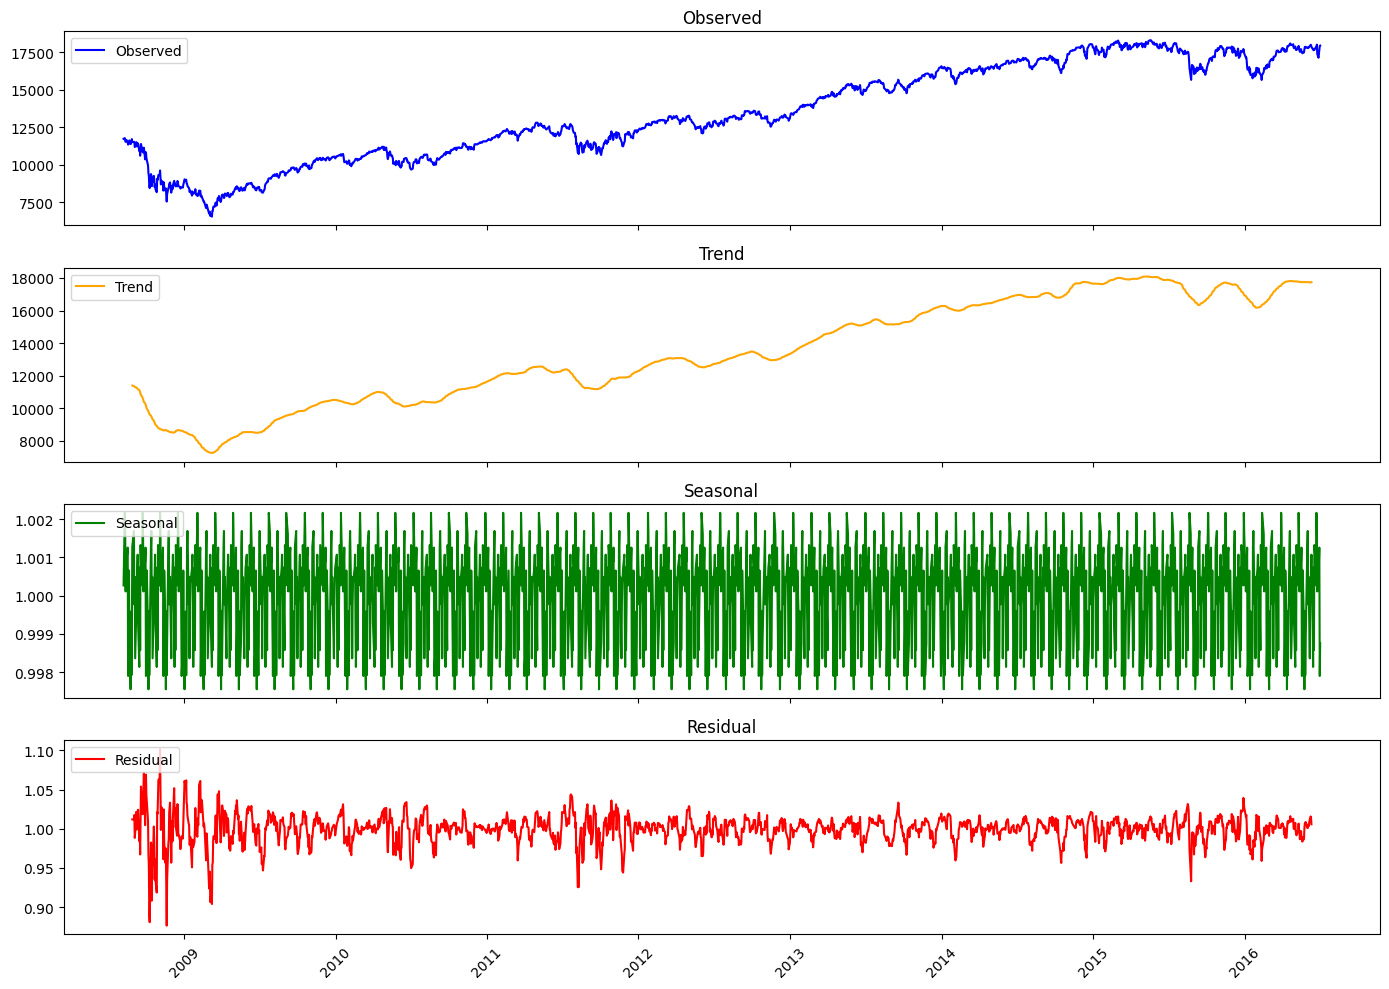

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Parse date column & set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()

# Step 2: Select and smooth Close column
data = df['Close']
moving_avg = data.rolling(window=5, min_periods=1).mean()
data_filled = data.fillna(moving_avg)

# Step 3: Decompose (multiplicative model for % seasonality)
decomposition = seasonal_decompose(data_filled, model='multiplicative', period=30)

# Step 4: Plot with proper formatting
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

axes[0].plot(decomposition.observed, label='Observed', color='blue')
axes[0].set_title('Observed')
axes[0].legend(loc='upper left')

axes[1].plot(decomposition.trend, label='Trend', color='orange')
axes[1].set_title('Trend')
axes[1].legend(loc='upper left')

axes[2].plot(decomposition.seasonal, label='Seasonal', color='green')
axes[2].set_title('Seasonal')
axes[2].legend(loc='upper left')

axes[3].plot(decomposition.resid, label='Residual', color='red')
axes[3].set_title('Residual')
axes[3].legend(loc='upper left')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Autocorrelation Plot (ACF)

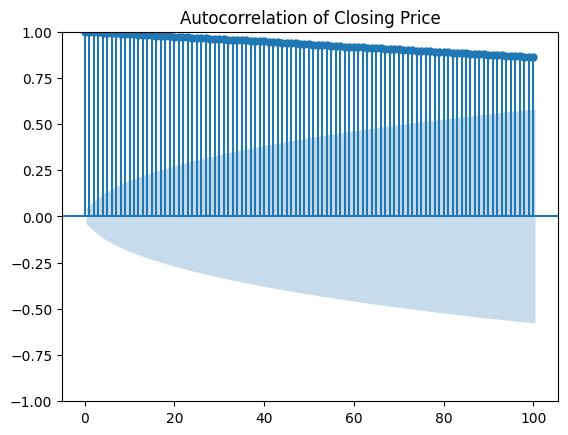

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Close'].dropna(), lags=100)
plt.title('Autocorrelation of Closing Price')
plt.show()


#### Partial Autocorrelation Plot (PACF)

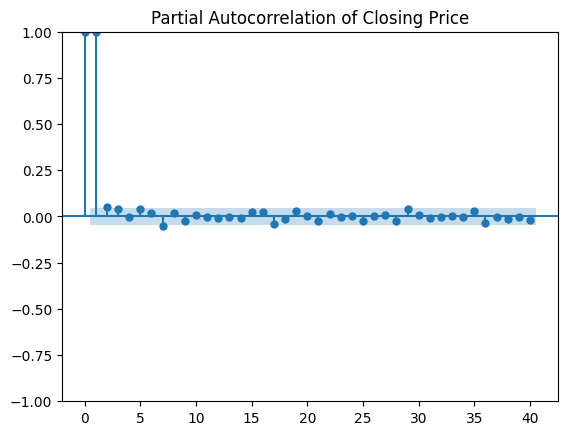

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Close'].dropna(), lags=40)
plt.title('Partial Autocorrelation of Closing Price')
plt.show()


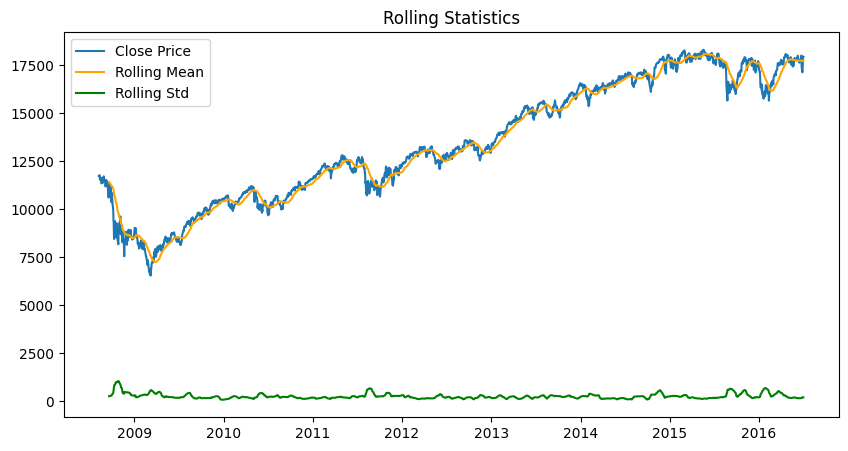

In [ ]:
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Close Price')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.title('Rolling Statistics')
plt.legend()
plt.show()


In [ ]:
# prompt: make one column of log transform of df['close']

df['Log Close'] = np.log(df['Close'])

In [ ]:
# prompt: write code to check if df['Close'] has staionarity or not using p value and statistical test and finally print that if it has staionairty

from statsmodels.tsa.stattools import adfuller
# Perform Augmented Dickey-Fuller test
result = adfuller(df['Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
# Check if stationary
if result[1] <= 0.05:
  print('The series is stationary (p-value <= 0.05)')
else:
  print('The series is likely not stationary (p-value > 0.05)')

ADF Statistic: -0.374713
p-value: 0.914236
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
The series is likely not stationary (p-value > 0.05)


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Daily Return',
       'MA7', 'MA21', 'Volatility', 'Log Close'],
      dtype='object')

##AR MODEL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
target = df['Log Close'].dropna()  # or df['Close']
train_size = int(len(target) * 0.8)
train, test = target[:train_size], target[train_size:]


In [ ]:
# Choose lag based on PACF plot, or use default maxlag
model = AutoReg(train, lags=100).fit()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Forecast for length of test set
pred = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
# Forecast for length of test set
pred = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Assign the index of the test set (y_true) to the predicted values (y_pred)
pred.index = test.index

# Use inverted if needed
y_true = test_inverted if 'test_inverted' in locals() else test
y_pred = pred_inverted if 'pred_inverted' in locals() else pred # This will now be the 'pred' Series with the correct index

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mask = y_true != 0
# Now the mask will align with y_true and y_pred for indexing
mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

MAE: 0.0289
RMSE: 0.0440
MAPE: 0.30%
R² Score: -0.4800


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


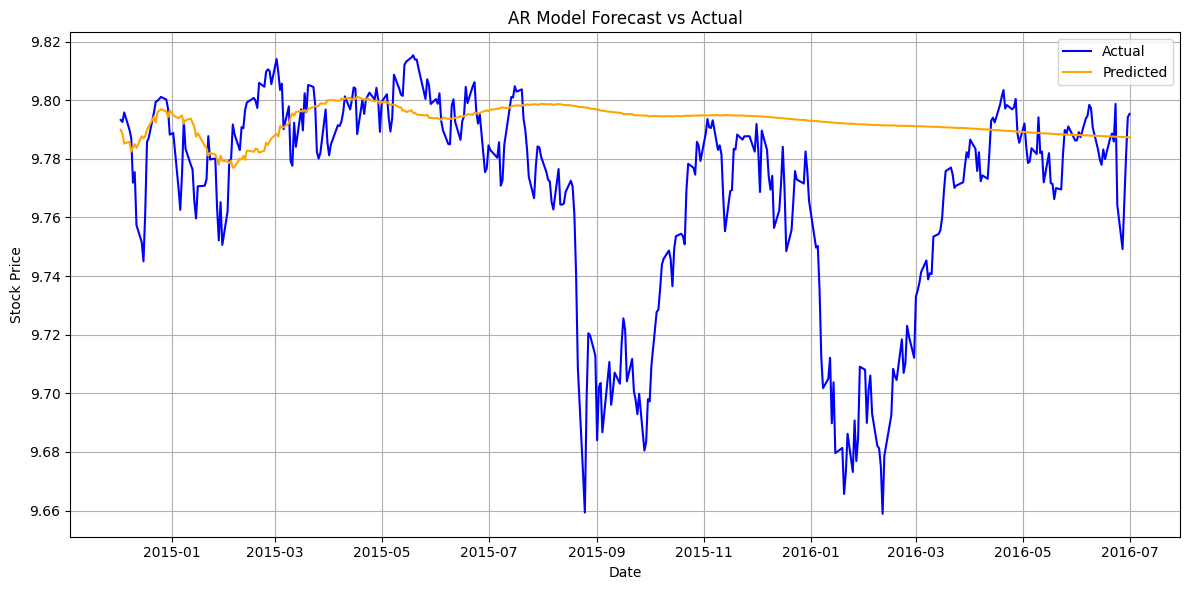

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_true.index, y_true, label='Actual', color='blue')
plt.plot(y_pred.index, y_pred, label='Predicted', color='orange')
plt.title('AR Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

###ARIMA

In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 16.6 MB/s eta 0:00:00


In [ ]:
import optuna
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


🚀 Optimizing ARIMA for: Close

🔍 Running Grid Search ARIMA for Close...
✅ Best ARIMA order for Close: (30, 0, 2)

🔧 Training ARIMA on: Close with order (30, 0, 2)


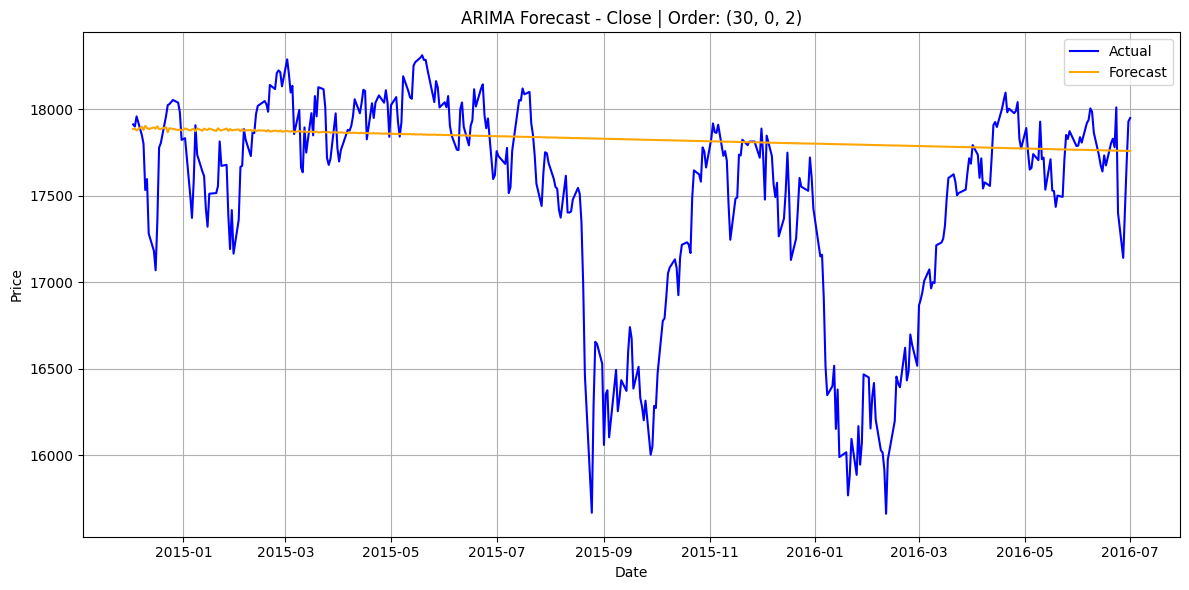


🚀 Optimizing ARIMA for: Log Close

🔍 Running Grid Search ARIMA for Log Close...
✅ Best ARIMA order for Log Close: (30, 0, 0)

🔧 Training ARIMA on: Log Close with order (30, 0, 0)


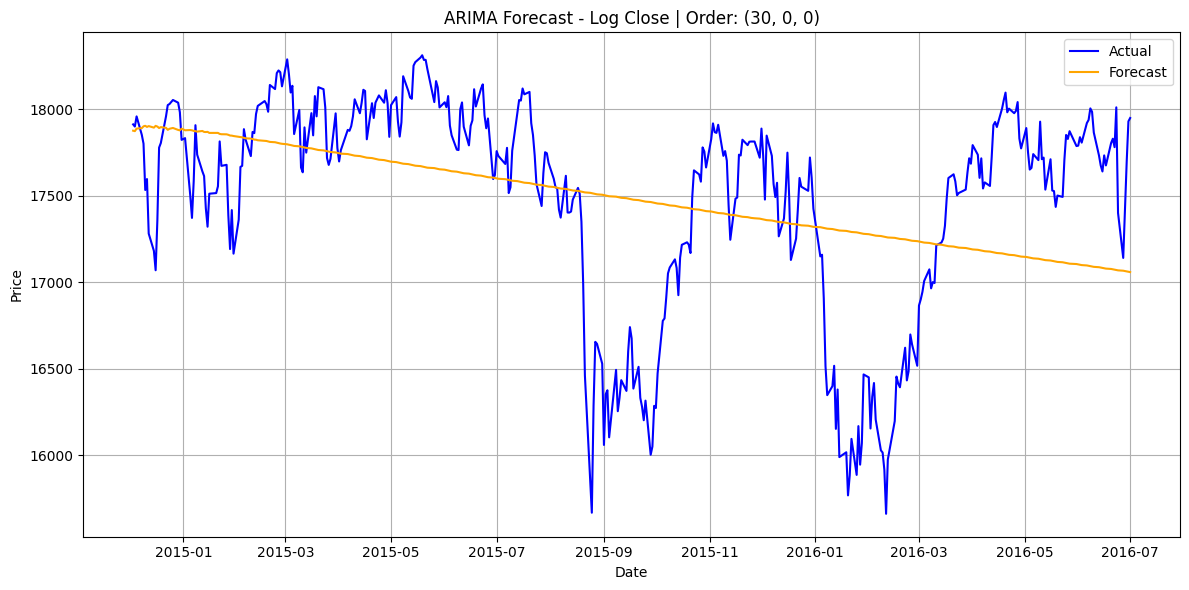


📊 Final Evaluation - Close
MAE: 458.5304
RMSE: 697.7121
MAPE: 2.73%
R²: -0.2750
Accuracy: 97.27%
Best Params: (30, 0, 2)

📊 Final Evaluation - Log Close
MAE: 469.8380
RMSE: 593.2337
MAPE: 2.74%
R²: 0.0782
Accuracy: 97.26%
Best Params: (30, 0, 0)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import product

# --- Load & preprocess your data (assume already done) ---
df = df.copy()
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

results = {}

# --- Evaluation function ---
def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    acc = 100 - mape
    return mae, rmse, mape, r2, acc

# --- Grid Search ---
def grid_search_arima(series, name):
    print(f"\n🔍 Running Grid Search ARIMA for {name}...")
    p_values = [30]
    d_values = [0, 1, 2]
    q_values = [0, 1, 2]
    best_score = float("inf")
    best_order = (0, 0, 0)

    # Split data
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]

    for order in product(p_values, d_values, q_values):
        try:
            model = ARIMA(train, order=order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=len(test))
            forecast.index = test.index

            if name == 'Log Close':
                y_pred = np.exp(forecast)
                y_true = np.exp(test)
            else:
                y_pred = forecast
                y_true = test

            mae = mean_absolute_error(y_true, y_pred)
            if mae < best_score:
                best_score = mae
                best_order = order
        except:
            continue

    print(f"✅ Best ARIMA order for {name}: {best_order}")
    return best_order

# --- Final ARIMA training function ---
def train_arima(series, name="Close", order=(2, 1, 1)):
    print(f"\n🔧 Training ARIMA on: {name} with order {order}")

    # Drop missing
    series = series.dropna()
    if name == 'Log Close':
        series = series[series > 0]

    # Split
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]

    # Fit
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(test))
    forecast.index = test.index

    if name == 'Log Close':
        y_pred = np.exp(forecast)
        y_true = np.exp(test)
    else:
        y_pred = forecast
        y_true = test

    # Evaluation
    mae, rmse, mape, r2, acc = evaluate_forecast(y_true, y_pred)

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R²': r2,
        'Accuracy': acc,
        'Forecast': y_pred,
        'Actual': y_true,
        'Best Params': order
    }

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual', color='blue')
    plt.plot(y_pred, label='Forecast', color='orange')
    plt.title(f'ARIMA Forecast - {name} | Order: {order}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return model_fit

# --- Run for both Close and Log Close ---
for col in ['Close', 'Log Close']:
    print(f"\n🚀 Optimizing ARIMA for: {col}")
    series = df[col].dropna()
    if col == 'Log Close':
        series = series[series > 0]
    best_order = grid_search_arima(series, col)
    _ = train_arima(series, name=col, order=best_order)

# --- Print Final Metrics ---
for name, metrics in results.items():
    print(f"\n📊 Final Evaluation - {name}")
    for k, v in metrics.items():
        if k in ['Forecast', 'Actual']: continue
        if k in ['MAPE', 'Accuracy']:
            print(f"{k}: {v:.2f}%")
        elif k == 'Best Params':
            print(f"{k}: {v}")
        else:
            print(f"{k}: {v:.4f}")


###ARIMA


📊 Evaluation Metrics for ARIMA(Log Close): order=(60, 0, 1)
MAE     : 515.5211
RMSE    : 621.6377
MAPE    : 2.98%
R² Score: -0.0121
Accuracy: 97.02%


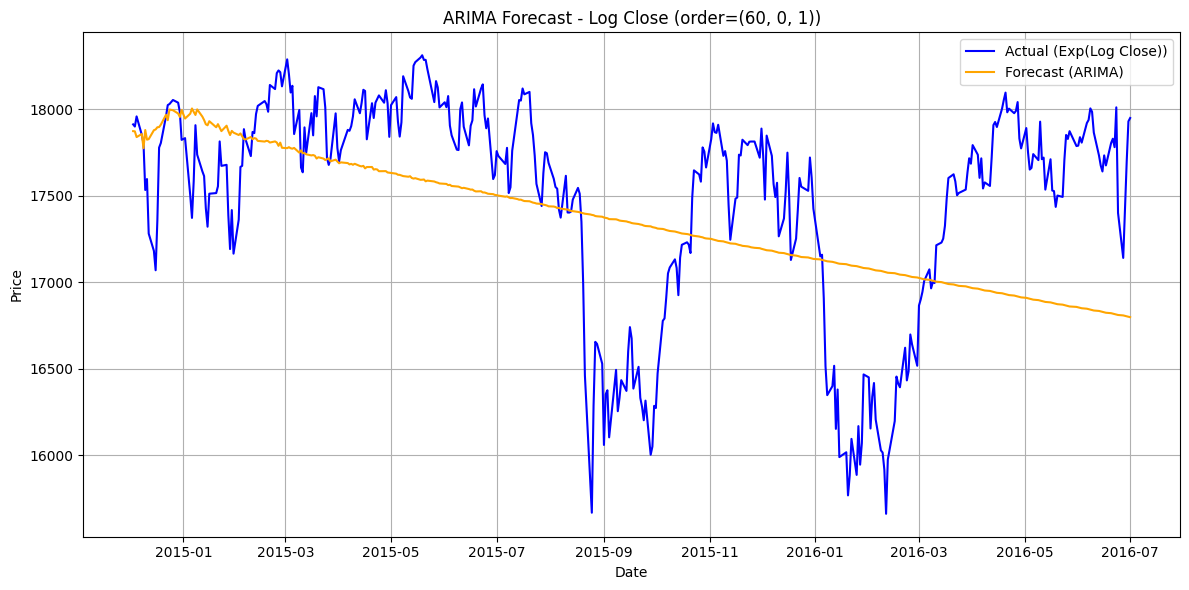

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Load and preprocess ---
df = df.copy()
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# --- Ensure Log Close is positive ---
df['Log Close'] = np.log(df['Close'])
series = df['Log Close'].dropna()
series = series[series > 0]  # remove non-positive log values if any

# --- Train-test split ---
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# --- Fit ARIMA model ---
order = (60, 0, 1)  # or you can tune this
model = ARIMA(train, order=order)
model_fit = model.fit()

# --- Forecast ---
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

# --- Inverse transform log values ---
y_pred = np.exp(forecast)
y_true = np.exp(test)

# --- Evaluation Metrics ---
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)
acc = 100 - mape

# --- Results ---
print(f"\n📊 Evaluation Metrics for ARIMA(Log Close): order={order}")
print(f"MAE     : {mae:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAPE    : {mape:.2f}%")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {acc:.2f}%")

# --- Visualization ---
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual (Exp(Log Close))', color='blue')
plt.plot(y_pred, label='Forecast (ARIMA)', color='orange')
plt.title(f'ARIMA Forecast - Log Close (order={order})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### LSTM

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

📊 Performance on One-Step LSTM Forecast (Log Close):
MAE  : 0.0578
RMSE : 0.0705
MAPE : 0.59%
R²   : 0.4932


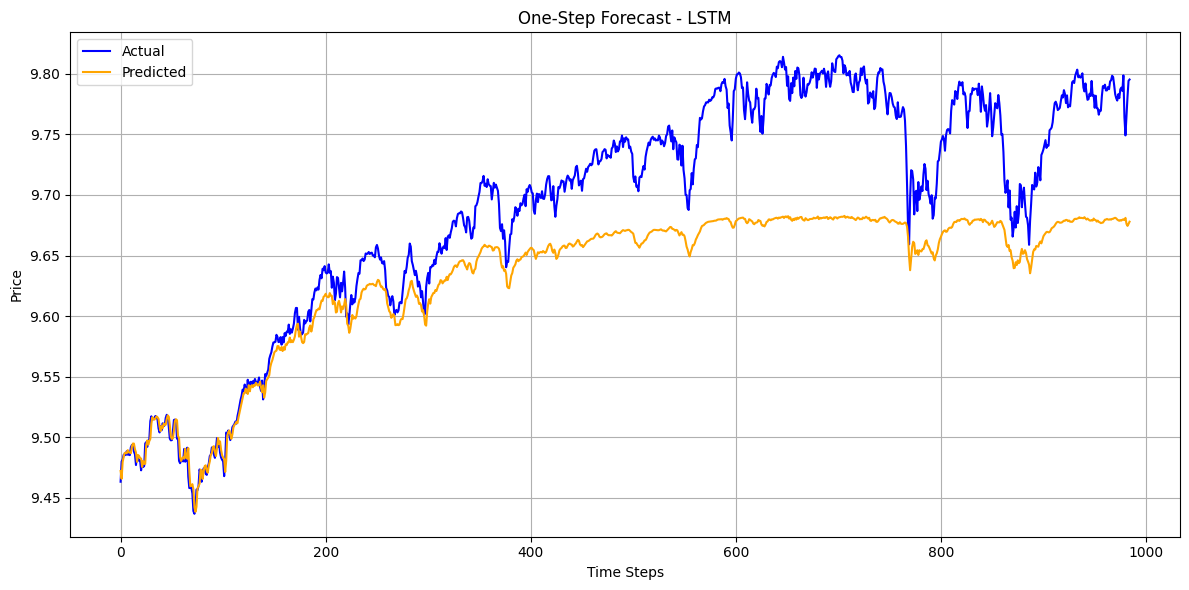

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load your dataset (ensure datetime index)
df = df.copy()
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# Use Log Close or Close
series = df['Log Close'].dropna().values.reshape(-1, 1)

# Normalize
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])  # fit only on first half to avoid leakage
series_scaled = scaler.transform(series).flatten()

# Create dataset using sliding window
T = 20  # window size
X, Y = [], []
for t in range(len(series_scaled) - T):
    X.append(series_scaled[t:t+T])
    Y.append(series_scaled[t+T])
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)

# Train/test split
N = len(X)
X_train, Y_train = X[:N//2], Y[:N//2]
X_test, Y_test = X[N//2:], Y[N//2:]

# Build LSTM model
def build_lstm_model(T):
    i = Input(shape=(T, 1))
    x = LSTM(10, return_sequences=False)(i)
    x = Dense(1)(x)
    model = Model(i, x)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))
    return model

model = build_lstm_model(T)
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=0)

# Predict on test set (one-step)
predictions_scaled = model.predict(X_test).flatten()
true_scaled = Y_test

# Inverse transform
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
true = scaler.inverse_transform(true_scaled.reshape(-1, 1)).flatten()

# Evaluation Metrics
mae = mean_absolute_error(true, predictions)
rmse = np.sqrt(mean_squared_error(true, predictions))
mape = np.mean(np.abs((true - predictions) / true)) * 100
r2 = r2_score(true, predictions)

print("\n📊 Performance on One-Step LSTM Forecast (Log Close):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.4f}")

# Plot Predictions
plt.figure(figsize=(12, 6))
plt.plot(true, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='orange')
plt.title('One-Step Forecast - LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Updated LSTM

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step

📊 Performance on One-Step LSTM Forecast (Log Close):
MAE  : 0.0330
RMSE : 0.0367
MAPE : 0.34%
R²   : 0.8603


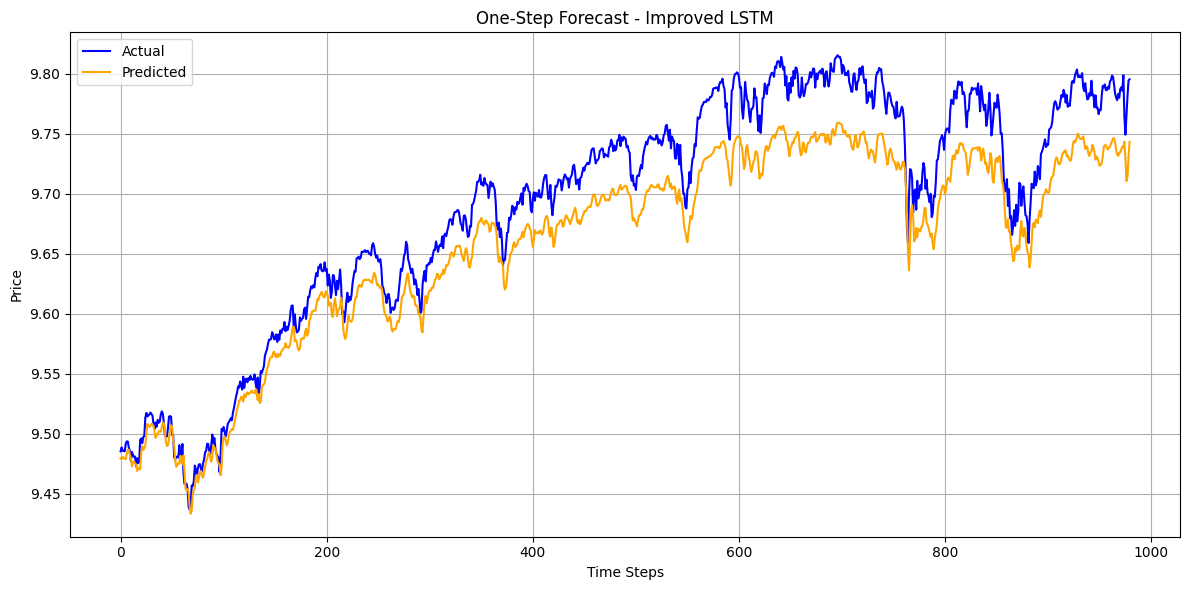

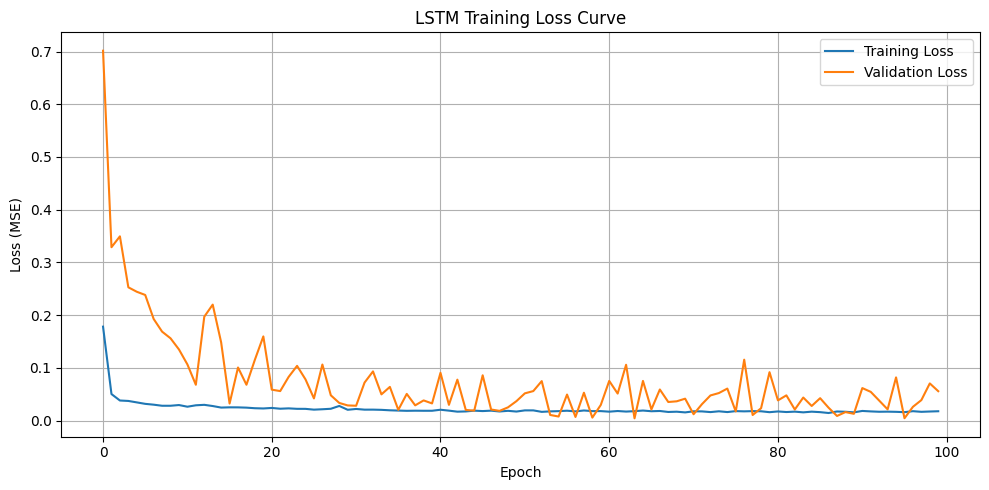

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset (ensure datetime index)
df = df.copy()
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# Use 'Log Close' or 'Close' column
series = df['Log Close'].dropna().values.reshape(-1, 1)

# Normalize
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])  # Prevent data leakage
series_scaled = scaler.transform(series).flatten()

# Create dataset using sliding window
T = 30  # Tuned window size
X, Y = [], []
for t in range(len(series_scaled) - T):
    X.append(series_scaled[t:t+T])
    Y.append(series_scaled[t+T])
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)

# Train/test split
N = len(X)
X_train, Y_train = X[:N//2], Y[:N//2]
X_test, Y_test = X[N//2:], Y[N//2:]

# Build improved LSTM model
def build_lstm_model(T):
    i = Input(shape=(T, 1))
    x = LSTM(128, return_sequences=True)(i)
    x = Dropout(0.2)(x)
    x = LSTM(62)(x)
    x = Dropout(0.2)(x)
    x = Dense(1)(x)
    model = Model(i, x)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
    return model

model = build_lstm_model(T)
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=0)

# Predict on test set (one-step)
predictions_scaled = model.predict(X_test).flatten()
true_scaled = Y_test

# Inverse transform
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
true = scaler.inverse_transform(true_scaled.reshape(-1, 1)).flatten()

# Evaluation Metrics
mae = mean_absolute_error(true, predictions)
rmse = np.sqrt(mean_squared_error(true, predictions))
mape = np.mean(np.abs((true - predictions) / true)) * 100
r2 = r2_score(true, predictions)

print("\n📊 Performance on One-Step LSTM Forecast (Log Close):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.4f}")

# Plot Predictions
plt.figure(figsize=(12, 6))
plt.plot(true, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='orange')
plt.title('One-Step Forecast - Improved LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step

📊 Performance on One-Step LSTM Forecast (Close):
MAE  : 446.4728
RMSE : 525.5220
MAPE : 2.63%
R²   : 0.8819


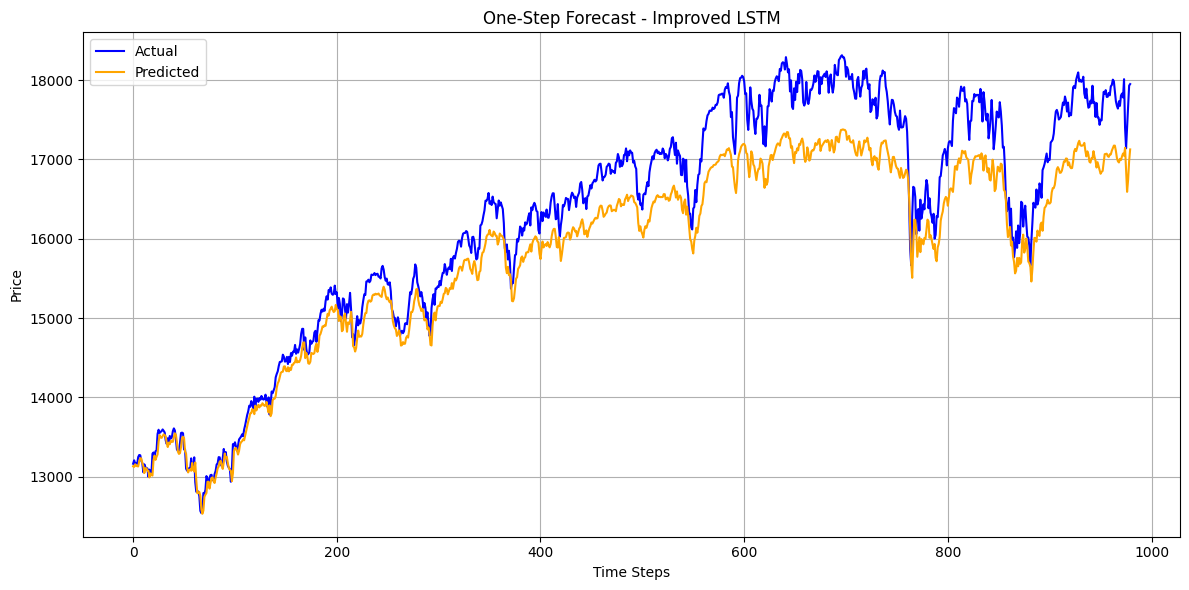

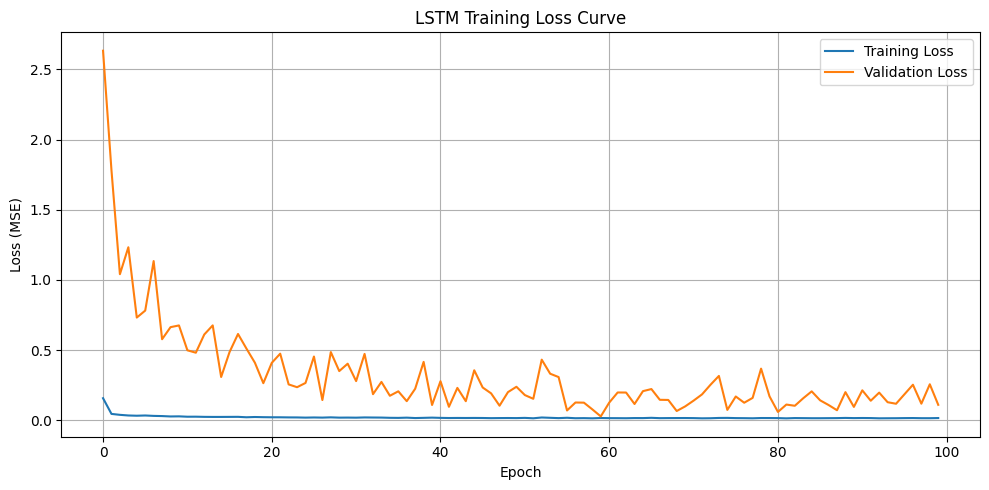

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset (ensure datetime index)
df = df.copy()
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# Use 'Log Close' or 'Close' column
series = df['Close'].dropna().values.reshape(-1, 1)

# Normalize
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])  # Prevent data leakage
series_scaled = scaler.transform(series).flatten()

# Create dataset using sliding window
T = 30  # Tuned window size
X, Y = [], []
for t in range(len(series_scaled) - T):
    X.append(series_scaled[t:t+T])
    Y.append(series_scaled[t+T])
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)

# Train/test split
N = len(X)
X_train, Y_train = X[:N//2], Y[:N//2]
X_test, Y_test = X[N//2:], Y[N//2:]

# Build improved LSTM model
def build_lstm_model(T):
    i = Input(shape=(T, 1))
    x = LSTM(128, return_sequences=True)(i)
    x = Dropout(0.2)(x)
    x = LSTM(64)(x)
    x = Dropout(0.2)(x)
    x = Dense(1)(x)
    model = Model(i, x)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
    return model

model = build_lstm_model(T)
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=0)

# Predict on test set (one-step)
predictions_scaled = model.predict(X_test).flatten()
true_scaled = Y_test

# Inverse transform
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
true = scaler.inverse_transform(true_scaled.reshape(-1, 1)).flatten()

# Evaluation Metrics
mae = mean_absolute_error(true, predictions)
rmse = np.sqrt(mean_squared_error(true, predictions))
mape = np.mean(np.abs((true - predictions) / true)) * 100
r2 = r2_score(true, predictions)

print("\n📊 Performance on One-Step LSTM Forecast (Close):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.4f}")

# Plot Predictions
plt.figure(figsize=(12, 6))
plt.plot(true, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='orange')
plt.title('One-Step Forecast - Improved LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step

📊 Performance on Multi-Step LSTM Forecast (Log Close):
MAE  : 0.0246
RMSE : 0.0291
MAPE : 0.25%
R²   : 0.3579


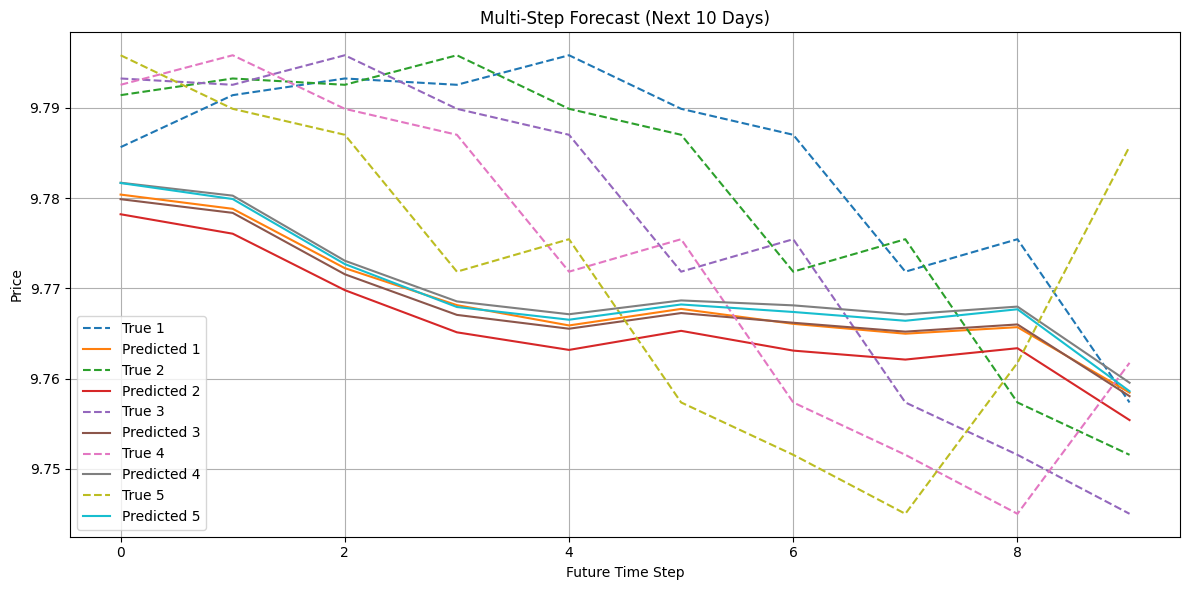

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# --- Load & prepare data ---
df = df.copy()
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# Use Log Close
series = df['Log Close'].dropna().values.reshape(-1, 1)

# Normalize
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series_scaled = scaler.transform(series).flatten()

# --- Create sequence dataset for multistep forecasting ---
T = 30                # past window size
N_STEPS = 10          # number of future steps to forecast
X, Y = [], []

for t in range(len(series_scaled) - T - N_STEPS):
    X.append(series_scaled[t:t+T])
    Y.append(series_scaled[t+T:t+T+N_STEPS])

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y).reshape(-1, N_STEPS)

# Split
N = len(X)
X_train, Y_train = X[:int(0.8*N)], Y[:int(0.8*N)]
X_test, Y_test = X[int(0.8*N):], Y[int(0.8*N):]

# --- Build LSTM Model ---
def build_multistep_lstm(T, N_STEPS):
    i = Input(shape=(T, 1))
    x = LSTM(64, return_sequences=True)(i)
    x = LSTM(32)(x)
    x = Dense(N_STEPS)(x)
    model = Model(i, x)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
    return model

model = build_multistep_lstm(T, N_STEPS)

# --- Train ---
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=0)

# --- Predict ---
Y_pred_scaled = model.predict(X_test)
Y_true_scaled = Y_test

# Inverse transform
Y_pred = scaler.inverse_transform(Y_pred_scaled)
Y_true = scaler.inverse_transform(Y_true_scaled)

# --- Evaluation (average over all steps) ---
mae = mean_absolute_error(Y_true, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_true, Y_pred))
mape = np.mean(np.abs((Y_true - Y_pred) / Y_true)) * 100
r2 = r2_score(Y_true, Y_pred)

print("\n📊 Performance on Multi-Step LSTM Forecast (Log Close):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.4f}")

# --- Plot a few forecast sequences ---
plt.figure(figsize=(12, 6))
n_plot = 5
for i in range(n_plot):
    plt.plot(Y_true[i], label=f'True {i+1}', linestyle='--')
    plt.plot(Y_pred[i], label=f'Predicted {i+1}')
plt.title(f'Multi-Step Forecast (Next {N_STEPS} Days)')
plt.xlabel('Future Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


###Keras Tuner LRU on one steo forecasting

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step

📊 Performance on One-Step LSTM Forecast (Close):
MAE  : 0.0223
RMSE : 0.0259
MAPE : 0.23%
R²   : 0.9302


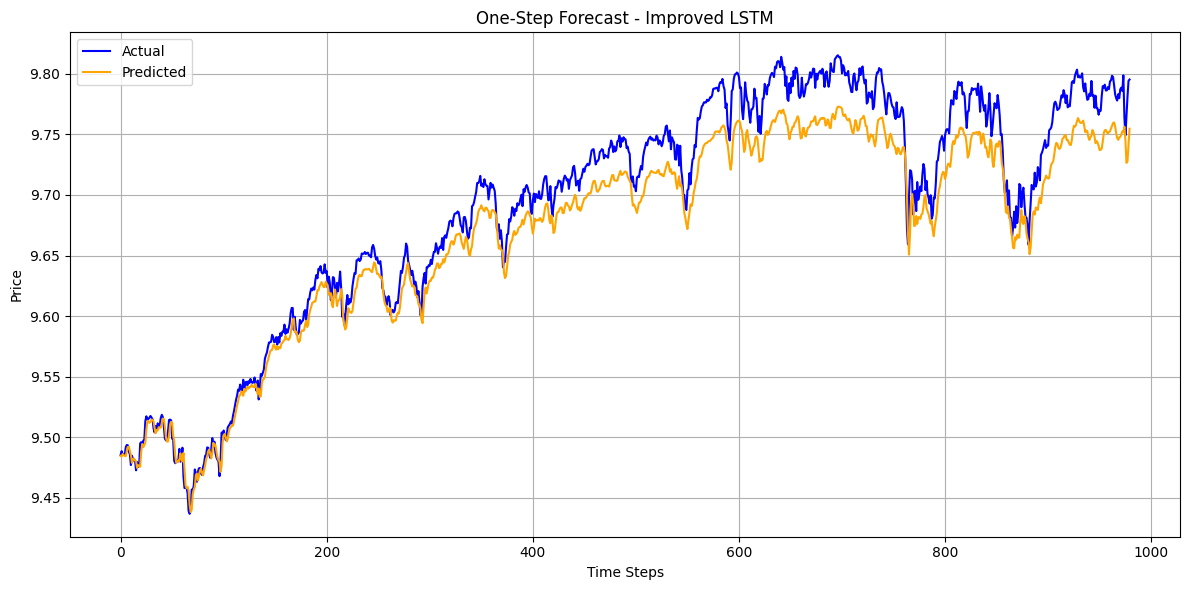

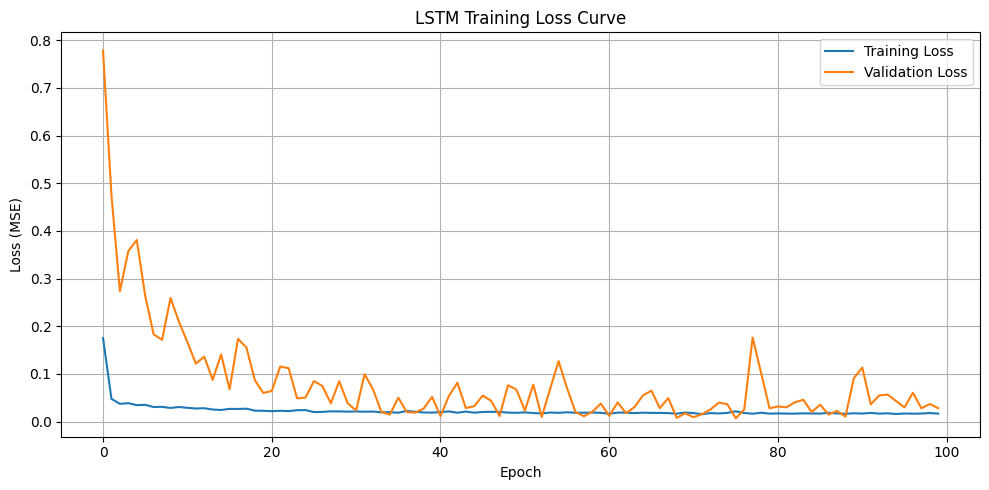

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset (ensure datetime index)
df = df.copy()
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# Use 'Log Close' or 'Close' column
series = df['Log Close'].dropna().values.reshape(-1, 1)

# Normalize
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])  # Prevent data leakage
series_scaled = scaler.transform(series).flatten()

# Create dataset using sliding window
T = 30  # Tuned window size
X, Y = [], []
for t in range(len(series_scaled) - T):
    X.append(series_scaled[t:t+T])
    Y.append(series_scaled[t+T])
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)

# Train/test split
N = len(X)
X_train, Y_train = X[:N//2], Y[:N//2]
X_test, Y_test = X[N//2:], Y[N//2:]

# Build improved LSTM model
def build_lstm_model(T):
    i = Input(shape=(T, 1))
    x = LSTM(128, return_sequences=True)(i)
    x = Dropout(0.2)(x)
    x = LSTM(64)(x)
    x = Dropout(0.2)(x)
    x = Dense(1)(x)
    model = Model(i, x)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
    return model

model = build_lstm_model(T)
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=0)

# Predict on test set (one-step)
predictions_scaled = model.predict(X_test).flatten()
true_scaled = Y_test

# Inverse transform
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
true = scaler.inverse_transform(true_scaled.reshape(-1, 1)).flatten()

# Evaluation Metrics
mae = mean_absolute_error(true, predictions)
rmse = np.sqrt(mean_squared_error(true, predictions))
mape = np.mean(np.abs((true - predictions) / true)) * 100
r2 = r2_score(true, predictions)

print("\n📊 Performance on One-Step LSTM Forecast (Close):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.4f}")

# Plot Predictions
plt.figure(figsize=(12, 6))
plt.plot(true, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='orange')
plt.title('One-Step Forecast - Improved LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
news=pd.read_csv('/content/Combined_News_DJIA.csv')

In [ ]:
news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [ ]:
import re
import pandas as pd

# Sample column names in the dataset
columns = [col for col in news.columns if col not in ["Date", "Label"]]

def basic_clean(text):
    """Perform basic cleaning:
       - Remove b' or leading/trailing quotes
       - Remove newline, tabs
       - Collapse multiple spaces
    """
    text = str(text)  # Ensure it's a string
    text = re.sub(r"^b[\"']", '', text)  # Remove starting b' or b"
    text = re.sub(r"[\"']$", '', text)    # Remove trailing quotes
    text = text.replace("\n", " ").replace("\t", " ")  # Newline/tab
    text = re.sub(r'\s+', ' ', text).strip()           # Collapse spaces
    return text

# Apply the basic cleaning to all text columns
for col in columns:
    news[col] = news[col].apply(basic_clean)

# Inspect first few rows
news.head()


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,...,Georgia Invades South Ossetia - if Russia gets...,Al-Qaeda Faces Islamist Backlash,"Condoleezza Rice: ""The US would not act to pre...",This is a busy day: The European Union has app...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory - And again in a serie...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict,Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks 'faked',What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,Israel and the US behind the Georgian aggression?,"""Do not believe TV, neither Russian nor Georgi...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer,War in South Ossetia [PICS],Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over ...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war,So this is what it's come to: trading sex for ...
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,Russia 'ends Georgia operation',"""If we had no sexual harassment we would have ...",Al-Qa'eda is losing support in Iraq because of...,Ceasefire in Georgia: Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,I'm Trying to Get a Sense of This Whole Georgi...,...,U.S. troops still in Georgia (did you know the...,Why Russias response to Georgia was right,"Gorbachev accuses U.S. of making a ""serious bl...","Russia, Georgia, and NATO: Cold War Two",Remember that adorable 62-year-old who led you...,War in Georgia: The Israeli connection,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?,BBC NEWS | Asia-Pacific | Extinction 'by man n...
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: re...,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters cameraman,"Britain\'s policy of being tough on drugs is ""...",Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,Bush announces Operation Get All Up In Russia'...,Russian forces sink Georgian ships,...,Elephants extinct by 2020?,US humanitarian missions soon in Georgia - if ...,Georgia's DDOS came from US sources,"Russian convoy heads into Georgia, violating t...",Israeli defence minister: US against strike on...,Gorbachev: We Had No Choice,Witness: Russian forces head towards Tbilisi i...,Quarter of Russians blame U.S. for conflict: poll,Georgian president says US military will take ...,2006: Nobel laureate Aleksander Solzhenitsyn a...
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia - 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,Rushdie Condemns Random House's Refusal to Pub...,Poland and US agree to missle defense deal. In...,"Will the Russians conquer Tblisi? Bet on it, n...",...,Bank analyst 

In [ ]:
# prompt: use columns from top1 to top15

top_columns = [f'Top{i}' for i in range(1, 16)]
# Select only the relevant columns from the news dataframe
news= news[['Date', 'Label'] + top_columns].copy()

# Convert 'Date' column to datetime
news['Date'] = pd.to_datetime(news['Date'])

news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,Georgian troops retreat from S. Osettain capit...,Did the U.S. Prep Georgia for War with Russia?,Rice Gives Green Light for Israel to Attack Ir...,Announcing:Class Action Lawsuit on Behalf of A...,So---Russia and Georgia are at war and the NYT...,China tells Bush to stay out of other countrie...,Did World War III start today?
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict,Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks 'faked',What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,Welcome To World War IV! Now In High Definition!,"Georgia's move, a mistake of monumental propor...",Russia presses deeper into Georgia; U.S. says ...,Abhinav Bindra wins first ever Individual Olym...,U.S. ship heads for Arctic to define territory,Drivers in a Jerusalem taxi station threaten t...,The French Team is Stunned by Phelps and the 4...
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,Russia 'ends Georgia operation',"""If we had no sexual harassment we would have ...",Al-Qa'eda is losing support in Iraq because of...,Ceasefire in Georgia: Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,I'm Trying to Get a Sense of This Whole Georgi...,The US military was surprised by the timing an...,U.S. Beats War Drum as Iran Dumps the Dollar,"Gorbachev: ""Georgian military attacked the Sou...",CNN use footage of Tskhinvali ruins to cover G...,Beginning a war as the Olympics were opening v...,55 pyramids as large as the Luxor stacked into...,The 11 Top Party Cities in the World
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: re...,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters cameraman,"Britain\'s policy of being tough on drugs is ""...",Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,Bush announces Operation Get All Up In Russia'...,Russian forces sink Georgian ships,The commander of a Navy air reconnaissance squ...,92% of CNN readers: Russia's actions in Georgi...,USA to send fleet into Black Sea to help Georg...,US warns against Israeli plan to strike agains...,"In an intriguing cyberalliance, two Estonian c...",The CNN Effect: Georgia Schools Russia in Info...,Why Russias response to Georgia was right
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia - 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,Rushdie Condemns Random House's Refusal to Pub...,Poland and US agree to missle defense deal. In...,"Will the Russians conquer Tblisi? Bet on it, n...","Russia exaggerating South Ossetian death toll,...",Musharraf expected to resign rather than face ...,Moscow Made Plans Months Ago to Invade Georgia,Why Russias response to Georgia was right,Nigeria has handed over the potentially oil-ri...,The US and Poland have agreed a preliminary de...,Russia apparently is sabotaging infrastructure...


In [ ]:
news_columns = [col for col in news.columns if col.startswith('Top')]

# ✅ Combine all Top1–Top25 columns into one
news['All_News'] = news[news_columns].astype(str).apply(lambda x: ' '.join(x), axis=1)

# ✅ Keep only Date, Label, All_News
final_news = news[['Date', 'Label', 'All_News']]
final_news.head()

,Date,Label,All_News
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...
1,2008-08-11,1,Why wont America and Nato help us? If they won...
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: re...
4,2008-08-14,1,All the experts admit that we should legalise ...


In [ ]:
!pip install transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import numpy as np
from tqdm import tqdm

# Model & Tokenizer
finbert_model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(finbert_model_name)
model = AutoModelForSequenceClassification.from_pretrained(finbert_model_name)

# Labels
labels = ["negative", "neutral", "positive"]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
def get_finbert_score(text, max_len=256):
    """Return sentiment scores (negative, neutral, positive) from FinBERT."""
    tokens = tokenizer.encode_plus(
        text,
        max_length=max_len,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(**tokens)
    scores = torch.nn.functional.softmax(outputs.logits, dim=-1).numpy().flatten()
    return scores


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm
import numpy as np

# Ensure GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = "ProsusAI/finbert"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

# Labels for FinBERT
labels = ["negative", "neutral", "positive"]

batch_size = 32
all_neg_values = []
all_neutral_values = []
all_pos_values = []
texts = final_news["All_News"].tolist()

for i in tqdm(range(0, len(texts), batch_size), desc="Scoring Sentiments"):
    batch_texts = texts[i:i + batch_size]
    # Tokenize batch
    encodings = tokenizer(batch_texts, return_tensors='pt',
                           padding=True, truncation=True,
                           max_length=128).to(device)

    # Get model output
    with torch.no_grad():
        outputs = model(**encodings)

    # Apply softmax
    scores = torch.nn.functional.softmax(outputs.logits, dim=-1).cpu().numpy()

    # Split into columns
    for score_array in scores:
        neg, neutral, pos = score_array
        all_neg_values.append(neg)
        all_neutral_values.append(neutral)
        all_pos_values.append(pos)

# Add columns
final_news["finbert_neg_score"] = all_neg_values
final_news["finbert_neutral_score"] = all_neutral_values
final_news["finbert_positive_score"] = all_pos_values



Scoring Sentiments: 100%|██████████| 63/63 [00:16<00:00,  3.80it/s]
/tmp/ipython-input-15-308628761.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news["finbert_neg_score"] = all_neg_values
/tmp/ipython-input-15-308628761.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news["finbert_neutral_score"] = all_neutral_values
/tmp/ipython-input-15-308628761.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [ ]:
final_news.head()


,Date,Label,All_News,finbert_neg_score,finbert_neutral_score,finbert_positive_score
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,0.020047,0.841385,0.138568
1,2008-08-11,1,Why wont America and Nato help us? If they won...,0.023065,0.771748,0.205187
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,0.021367,0.782538,0.196095
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: re...,0.018802,0.867630,0.113568
4,2008-08-14,1,All the experts admit that we should legalise ...,0.048609,0.693747,0.257644


In [ ]:
# prompt: Using dataframe final_news: download final_news

final_news.to_csv('final_news.csv', index=False)

In [ ]:
from google.colab import files
files.download('final_news.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.6 MB/s eta 0:00:00


In [ ]:
final_news["daily_sentiment_score"] = final_news["finbert_positive_score"] - final_news["finbert_neg_score"]

# ✅ Done!
print(final_news.head())

        Date  Label                                           All_News  \
0 2008-08-08      0  Georgia 'downs two Russian warplanes' as count...   
1 2008-08-11      1  Why wont America and Nato help us? If they won...   
2 2008-08-12      0  Remember that adorable 9-year-old who sang at ...   
3 2008-08-13      0  U.S. refuses Israel weapons to attack Iran: re...   
4 2008-08-14      1  All the experts admit that we should legalise ...   

   finbert_neg_score  finbert_neutral_score  finbert_positive_score  \
0           0.020047               0.841385                0.138568   
1           0.023065               0.771748                0.205187   
2           0.021367               0.782538                0.196095   
3           0.018802               0.867630                0.113568   
4           0.048609               0.693747                0.257644   

   daily_sentiment_score  
0               0.118521  
1               0.182122  
2               0.174728  
3               0.09

/tmp/ipython-input-19-3775517571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news["daily_sentiment_score"] = final_news["finbert_positive_score"] - final_news["finbert_neg_score"]


In [ ]:
# 1️⃣ Ensure Date columns are datetime
final_news["Date"] = pd.to_datetime(final_news["Date"])
df["Date"] = pd.to_datetime(df["Date"])

# 2️⃣ Keep only the required columns from final_news
sentiment_cols = ["Date", "finbert_neg_score", "finbert_neutral_score",
                  "finbert_positive_score", "daily_sentiment_score"]

final_news_sub = final_news[sentiment_cols]

# 3️⃣ Merge final_news_sub into df
df = df.merge(final_news_sub, on="Date", how="left")

# 4️⃣ Confirm
print(df.head())


        Date          Open          High           Low         Close  \
0 2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1 2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2 2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3 2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4 2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   

      Volume     Adj Close  Daily Return  MA7  MA21  finbert_neg_score  \
0   82160000  17949.369141           NaN  NaN   NaN           0.053962   
1  133030000  17929.990234     -0.001080  NaN   NaN           0.055223   
2  106380000  17694.679688     -0.013124  NaN   NaN           0.032065   
3  112190000  17409.720703     -0.016104  NaN   NaN           0.016760   
4  138740000  17140.240234     -0.015479  NaN   NaN           0.022153   

   finbert_neutral_score  finbert_positive_score  daily_sentiment_score  
0               0.363350                0.582688

/tmp/ipython-input-20-838602786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news["Date"] = pd.to_datetime(final_news["Date"])


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0
Daily Return,1
MA7,0
MA21,0


In [ ]:
# prompt: in df['MA7'] and df['MA21']  ,, fill null values with their respective mean

df['MA7'].fillna(df['MA7'].mean(), inplace=True)
df['MA21'].fillna(df['MA21'].mean(), inplace=True)


/tmp/ipython-input-21-3077328960.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MA7'].fillna(df['MA7'].mean(), inplace=True)
/tmp/ipython-input-21-3077328960.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
df.sample(6)

,Date,Open,High,Low,Close,Volume,Adj Close,Daily Return,MA7,MA21,finbert_neg_score,finbert_neutral_score,finbert_positive_score,daily_sentiment_score
1692,2009-10-12,9865.240234,9931.820312,9849.370117,9885.799805,158850000,9885.799805,0.001493,9995.034459,9941.715820,0.132429,0.179260,0.688311,0.555882
1927,2008-11-04,9323.889648,9653.950195,9323.889648,9625.280273,254930000,9625.280273,0.053178,8893.044224,8548.408040,0.029472,0.757808,0.212720,0.183249
1706,2009-09-22,9779.610352,9843.400391,9771.910156,9829.870117,194620000,9829.870117,0.008342,9742.127372,9803.117792,0.079667,0.040800,0.879532,0.799865
726,2013-08-14,15447.709961,15453.080078,15316.620117,15337.660156,91030000,15337.660156,0.014920,15058.048689,15005.782831,0.027561,0.791443,0.180996,0.153435
1468,2010-09-01,10016.009766,10279.080078,10016.009766,10269.469727,205710000,10269.469727,-0.004906,10377.601284,10598.066127,0.033262,0.773457,0.193281,0.160019
1367,2011-01-26,11978.849609,12020.519531,11961.830078,11985.440430,168320000,11985.440430,-0.000366,11976.470006,12140.196196,0.022161,0.735147,0.242691,0.220530


In [ ]:
# prompt: df['Log Close']=log(df['Close']

from numpy import log
df['Log Close']=log(df['Close'])


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Daily Return', 'MA7', 'MA21', 'finbert_neg_score',
       'finbert_neutral_score', 'finbert_positive_score',
       'daily_sentiment_score', 'Log Close'],
      dtype='object')

In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file named 'df.csv'
# index=False prevents writing the DataFrame index as a column in the CSV
df.to_csv('df.csv', index=False)

# Now download the file
files.download("df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0825 - val_loss: 6.3898e-04
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0097 - val_loss: 5.7743e-04
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0092 - val_loss: 4.7933e-04
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0078 - val_loss: 4.9955e-04
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0066 - val_loss: 0.0019
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0086 - val_loss: 6.5592e-04
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0065 - val_loss: 4.8740e-04
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0092 - val_loss: 4.8400e-04
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0061 - val_loss: 4.8838e-04
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0058 - val_loss: 4.4677e-04
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0049 - val_loss: 5.4225e-04
Epoch 12/100

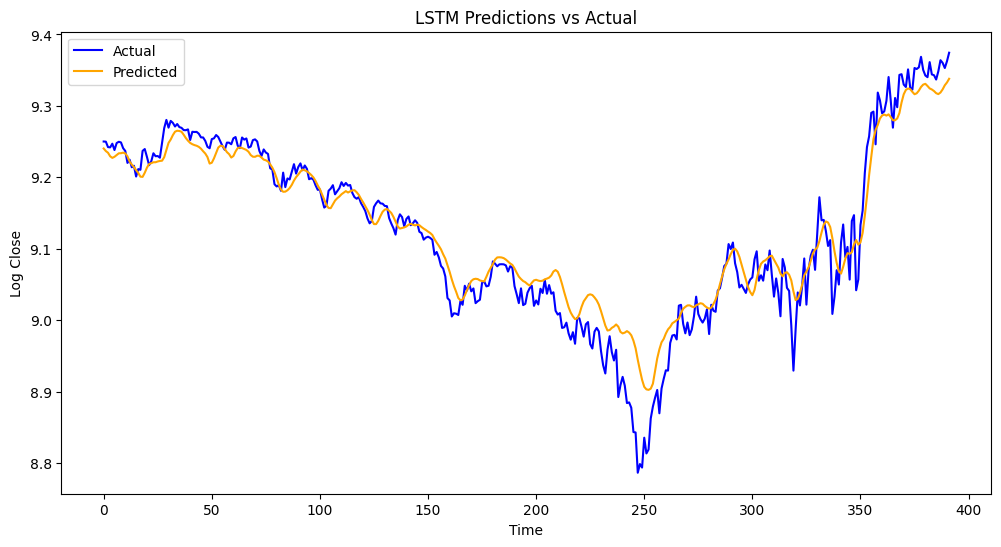

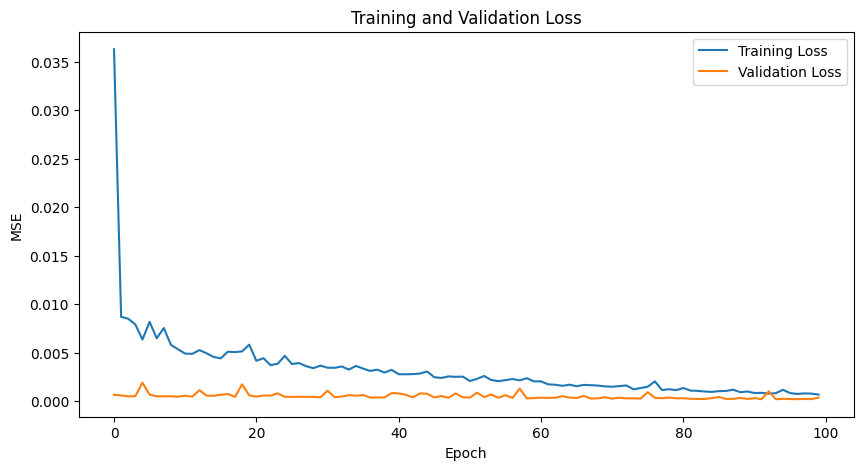

In [ ]:
# ===================================================
# IMPORTS
# ===================================================
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ===================================================
# DATA PREPARATION
# ===================================================
# Features and Target
features = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'MA7', 'MA21',
     'daily_sentiment_score'
]

target_col = 'Log Close'  # target
window_size = 30

# Ensure datetime index
df = df.copy()
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# Create scaled feature set
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_data = df[features].values
y_data = df[target_col].values.reshape(-1, 1)

X_data_scaled = scaler_x.fit_transform(X_data)
y_data_scaled = scaler_y.fit_transform(y_data)

# Create sequences
X, Y = [], []
for t in range(len(X_data_scaled) - window_size - 1):
    X.append(X_data_scaled[t:t + window_size])
    Y.append(y_data_scaled[t + window_size])  # next-day prediction
X = np.array(X)
Y = np.array(Y)

# ===================================================
# TRAIN-TEST SPLIT
# ===================================================
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# ===================================================
# BUILD LSTM MODEL
# ===================================================
def build_model(window_size, n_features):
    i = Input(shape=(window_size, n_features))
    x = LSTM(128, return_sequences=True)(i)
    x = Dropout(0.3)(x)
    x = LSTM(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(1)(x)
    model = Model(i, x)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
    return model

model = build_model(window_size, X_train.shape[-1])

# ===================================================
# TRAIN MODEL
# ===================================================
history = model.fit(X_train, Y_train, epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

# ===================================================
# PREDICTION
# ===================================================
Y_pred_scaled = model.predict(X_test)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
Y_true = scaler_y.inverse_transform(Y_test)

# ===================================================
# EVALUATION
# ===================================================
mae = mean_absolute_error(Y_true, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_true, Y_pred))
mape = np.mean(np.abs((Y_true - Y_pred) / Y_true)) * 100
r2 = r2_score(Y_true, Y_pred)

print("\n📊 Final LSTM Model Evaluation:\n"
      f"MAE  : {mae:.4f}\n"
      f"RMSE : {rmse:.4f}\n"
      f"MAPE : {mape:.2f}%\n"
      f"R²   : {r2:.4f}")

# ===================================================
# PLOTS
# ===================================================
# Predictions vs True
plt.figure(figsize=(12, 6))
plt.plot(Y_true, label='Actual', color='blue')
plt.plot(Y_pred, label='Predicted', color='orange')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Log Close')
plt.legend()
plt.show()

# Training vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [ ]:
pip install shap


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
7900/7900 ━━━━━━━━━━━━━━━━━━━━ 154s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
7900/7900 ━━━━━━━━━━━━━━━━━━━━ 146s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
7900/7900 ━━━━━━━━━━━━━━━━━━━━ 150s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
7900/7900 ━━━━━━━━━━━━━━━━━━━━ 156s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
7900/7900 ━━━━━━━━━━━━━━━━━━━━ 152s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
7900/7900 ━━━━━━━━━━━━━━━━━━━━ 150s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
7900/7900 ━━━━━━━━━━━━━━━━━━━━ 153s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
7900/7900 ━━━━━━━━━━━━━━━━━━━━ 149s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
7900/7900 ━━━━━━━━━━━━━━━━━━━━ 150s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
7900/7900 ━━━━━━━━━━━━━━━━━━━━ 149s 19ms/step


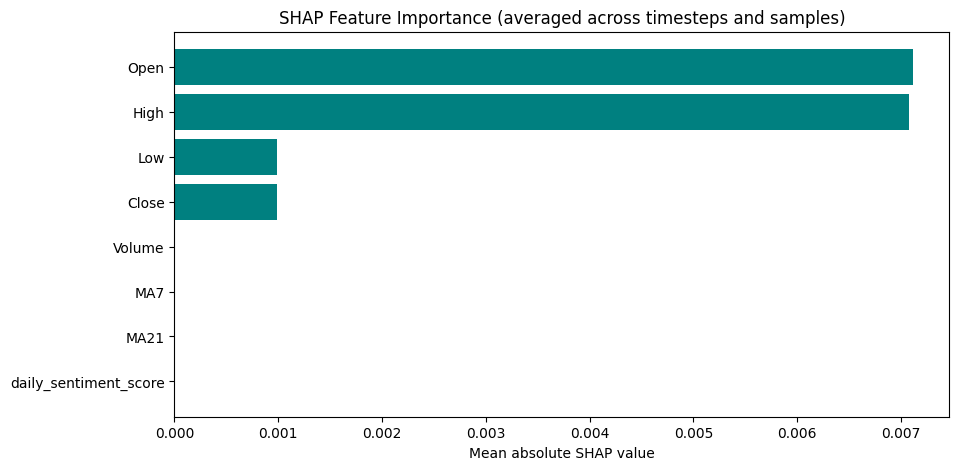

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assume 'model', 'X_train', 'X_test', 'window_size', 'features' are defined from previous cells

# Create a SHAP explainer for your LSTM
# The explainer's background data should also be reshaped
# Reshape X_train for the explainer background data
X_train_reshaped = X_train[:100].reshape(100, window_size * len(features))
explainer = shap.KernelExplainer(lambda x: model.predict(x.reshape(-1, window_size, len(features))), X_train_reshaped)

# Choose some test samples
X_sample = X_test[:10]

# Reshape X_sample for computing SHAP values
# Flatten each sample's window into a single row of features
X_sample_reshaped = X_sample.reshape(10, window_size * len(features))


# Compute SHAP values using the reshaped sample data
shap_values = explainer.shap_values(X_sample_reshaped)

# Resulting shape of shap_values will be [10, window_size * num_features]
# Reshape the SHAP values back to the original time series structure for interpretation
shap_values_reshaped = np.array(shap_values).reshape(10, window_size, len(features))

# Aggregate over timesteps for feature-level importance
# Calculate the mean absolute SHAP value for each feature across all timesteps in the window
shap_values_aggregated = np.abs(shap_values_reshaped).mean(axis=1)

# Plot average feature importances across samples
average_importance = shap_values_aggregated.mean(axis=0)
feature_names = features
plt.figure(figsize=(10,5))
plt.barh(feature_names, average_importance, color='teal')
plt.gca().invert_yaxis()
plt.title("SHAP Feature Importance (averaged across timesteps and samples)")
plt.xlabel("Mean absolute SHAP value")
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Feature Importance (Permutation Impact on MSE):

Feature: High                      Impact: 0.002491
Feature: Open                      Impact: 0.002239
Feature: Low                       Impact: 0.001301
Feature: Close                     Impact: 0.001260
Feature: MA7                       Impact: 0.000379
Feature: MA21                      Impact: 0.000094
Feature: daily_sentiment_score     Impact: -0.000040
Feature: Volume                    Impact: -0.000165


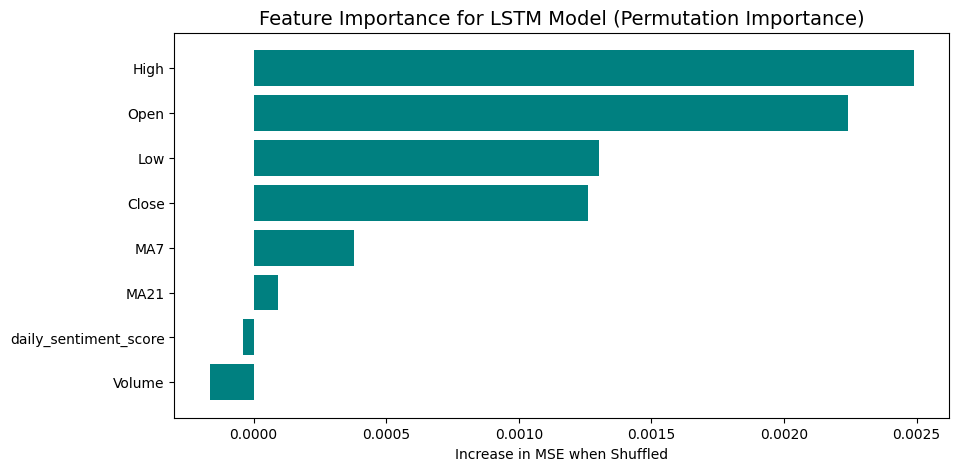

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ===================================================
# BASELINE PERFORMANCE
# ===================================================
baseline_predictions = model.predict(X_test)
baseline_score = mean_squared_error(Y_test, baseline_predictions)

# ===================================================
# PERMUTATION IMPORTANCE CALCULATION
# ===================================================
feature_importance = []
for i in range(X_test.shape[2]):  # Loop over features
    X_permuted = X_test.copy()
    # Randomly shuffle one feature across all timesteps and samples
    for t in range(X_permuted.shape[1]):  # Optional: You can shuffle per timestep
        np.random.shuffle(X_permuted[:, t, i])
    permuted_predictions = model.predict(X_permuted)
    permuted_score = mean_squared_error(Y_test, permuted_predictions)
    importance_score = permuted_score - baseline_score
    feature_importance.append((features[i], importance_score))

# ===================================================
# SORT AND VISUALIZE
# ===================================================
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Print results
print("\nFeature Importance (Permutation Impact on MSE):\n")
for feat, score in feature_importance:
    print(f"Feature: {feat:<25} Impact: {score:.6f}")

# Plot
plt.figure(figsize=(10, 5))
plt.barh([f[0] for f in feature_importance], [f[1] for f in feature_importance], color='teal')
plt.gca().invert_yaxis()
plt.title("Feature Importance for LSTM Model (Permutation Importance)", fontsize=14)
plt.xlabel("Increase in MSE when Shuffled")
plt.show()


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Daily Return,MA7,MA21,finbert_neg_score,finbert_neutral_score,finbert_positive_score,daily_sentiment_score,Log Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,NaN,13459.288568,13451.098264,0.053962,0.363350,0.582688,0.528727,9.795310
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,-0.001080,13459.288568,13451.098264,0.055223,0.547899,0.396879,0.341656,9.794230
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,-0.013124,13459.288568,13451.098264,0.032065,0.616715,0.351220,0.319155,9.781019
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,-0.016104,13459.288568,13451.098264,0.016760,0.921956,0.061284,0.044524,9.764784
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,-0.015479,13459.288568,13451.098264,0.022153,0.941810,0.036038,0.013885,9.749184


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Daily Return', 'MA7', 'MA21', 'finbert_neg_score',
       'finbert_neutral_score', 'finbert_positive_score',
       'daily_sentiment_score', 'Log Close'],
      dtype='object')

In [ ]:
pip install gym keras tensorflow scikit-learn


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/df.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Daily Return,MA7,MA21,finbert_neg_score,finbert_neutral_score,finbert_positive_score,daily_sentiment_score,Log Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,NaN,13459.288568,13451.098264,0.053962,0.363350,0.582688,0.528727,9.795310
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,-0.001080,13459.288568,13451.098264,0.055223,0.547899,0.396879,0.341656,9.794230
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,-0.013124,13459.288568,13451.098264,0.032065,0.616715,0.351220,0.319155,9.781019
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,-0.016104,13459.288568,13451.098264,0.016760,0.921956,0.061284,0.044524,9.764784
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,-0.015479,13459.288568,13451.098264,0.022153,0.941810,0.036038,0.013885,9.749184


## Reinforcement Learning

### DQN ALG

In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class TradingEnvironment(gym.Env):
    def __init__(self, df, initial_capital=10000, transaction_cost=0.001, window_size=30):
        super(TradingEnvironment, self).__init__()

        self.df = df.reset_index(drop=True)
        self.initial_capital = initial_capital
        self.transaction_cost = transaction_cost
        self.window_size = window_size
        self.current_step = window_size
        self.capital = initial_capital
        self.position = 0
        self.last_price = None

        # Features
        self.features = [
            'Open','High','Low','Close','Volume','MA7','MA21',
            'finbert_neg_score','finbert_neutral_score','finbert_positive_score','daily_sentiment_score'
        ]
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(window_size, len(self.features)), dtype=np.float32)

        # Action space: 0 = Sell, 1 = Hold, 2 = Buy
        self.action_space = spaces.Discrete(3)

    def reset(self):
        self.current_step = self.window_size
        self.capital = self.initial_capital
        self.position = 0
        self.last_price = self.df.loc[self.current_step, 'Close']
        return self._get_observation()

    def _get_observation(self):
        obs = self.df.loc[self.current_step-self.window_size:self.current_step-1, self.features].values
        return obs

    def step(self, action):
        price = self.df.loc[self.current_step, 'Close']
        reward = 0

        # Action Logic
        if action == 2:  # Buy
            if self.position == 0:
                self.position = self.capital / price
                self.capital = 0
        elif action == 0:  # Sell
            if self.position > 0:
                self.capital = self.position * price * (1 - self.transaction_cost)
                self.position = 0

        # Reward = Change in total portfolio value
        total_value = self.capital + self.position * price
        prev_total_value = self.capital + self.position * self.last_price
        reward = total_value - prev_total_value

        self.last_price = price
        self.current_step += 1
        done = self.current_step >= len(self.df) - 1
        return self._get_observation(), reward, done, {}

    def get_total_value(self, price):
        return self.capital + self.position * price


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from collections import deque
import random

def build_model(window_size, num_features, num_actions):
    inputs = layers.Input(shape=(window_size, num_features))
    x = layers.Flatten()(inputs)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_actions, activation='linear')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model


In [ ]:
# Hyperparameters
EPISODES = 50
BATCH_SIZE = 32
GAMMA = 0.99
MEMORY_SIZE = 1000
EPSILON_START = 1.0
EPSILON_MIN = 0.01
EPSILON_DECAY = 0.99

# Setup
env = TradingEnvironment(df)
state_dim = (env.window_size, len(env.features))
action_dim = env.action_space.n
model = build_model(env.window_size, len(env.features), action_dim)

memory = deque(maxlen=MEMORY_SIZE)

def choose_action(state, epsilon):
    if np.random.rand() <= epsilon:
        return np.random.randint(action_dim)
    q_values = model.predict(np.expand_dims(state, axis=0), verbose=0)
    return np.argmax(q_values[0])

# Training Loop
for e in range(EPISODES):
    state = env.reset()
    total_reward = 0
    while True:
        action = choose_action(state, EPSILON_START)
        next_state, reward, done, _ = env.step(action)

        memory.append((state, action, reward, next_state, done))
        state = next_state
        total_reward += reward

        if done:
            break

    # Experience Replay
    if len(memory) >= BATCH_SIZE:
        batch = random.sample(memory, BATCH_SIZE)
        state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*batch)

        state_batch = np.array(state_batch)
        next_state_batch = np.array(next_state_batch)

        target_q_values = model.predict(state_batch, verbose=0)
        next_q_values = model.predict(next_state_batch, verbose=0)

        for i in range(BATCH_SIZE):
            target = reward_batch[i]
            if not done_batch[i]:
                target = reward_batch[i] + GAMMA * np.amax(next_q_values[i])
            target_q_values[i][action_batch[i]] = target

        model.fit(state_batch, target_q_values, epochs=1, verbose=0)

    EPSILON_START = max(EPSILON_MIN, EPSILON_START * EPSILON_DECAY)
    final_value = env.get_total_value(env.df.loc[env.current_step-1, 'Close'])
    print(f"Episode {e + 1}/{EPISODES} - Total Reward: {total_reward:.2f}, Final Value: $qw {final_value:.2f}")



NameError: name 'TradingEnvironment' is not defined

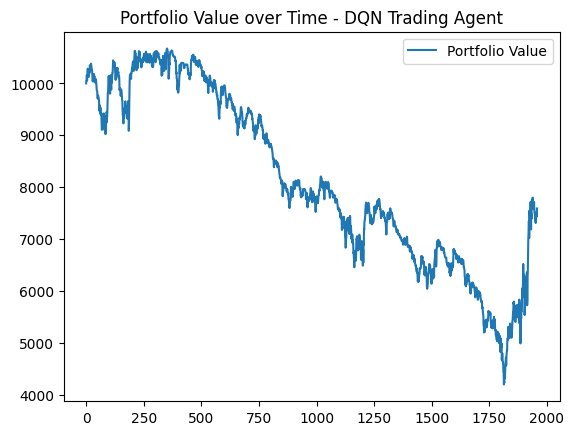


📊 Final Results:
-----------------------------
Final Portfolio Value: $7591.39
Cumulative Return    : -24.09%
Annualized Return     : -3.48%


In [ ]:
# Evaluation
state = env.reset()
values = []
while True:
    action = np.argmax(model.predict(np.expand_dims(state, axis=0), verbose=0))
    next_state, reward, done, _ = env.step(action)
    state = next_state
    values.append(env.get_total_value(env.df.loc[env.current_step-1, 'Close']))
    if done:
        break

# Final Evaluation Metrics
final_values = np.array(values)
initial_value = final_values[0]
cumulative_return = (final_values[-1] - initial_value) / initial_value
annualized_return = (1 + cumulative_return) ** (252 / len(final_values)) - 1

# Compare actual vs predicted (just for returns plotting demonstration)
import matplotlib.pyplot as plt

plt.plot(final_values, label="Portfolio Value")
plt.title("Portfolio Value over Time - DQN Trading Agent")
plt.legend()
plt.show()

print("\n📊 Final Results:\n-----------------------------")
print(f"Final Portfolio Value: ${final_values[-1]:.2f}")
print(f"Cumulative Return    : {cumulative_return * 100:.2f}%")
print(f"Annualized Return     : {annualized_return * 100:.2f}%")
